In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageFile
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout
print(tf.__version__)
import PIL

import time
import numpy as np
import os
import pydot
from typing import List, Tuple
from matplotlib.pyplot import imshow
%matplotlib inline
import matplotlib.pyplot as plt
import PIL.Image
import pathlib
import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model

from tensorflow.python.keras.utils import layer_utils
#from tensorflow.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG

import scipy.misc

import tensorflow.keras.backend as K
K.set_image_data_format('channels_last') # can be channels_first or channels_last.
#K.set_learning_phase(1) # 1 stands for learning phase
print(tf.__version__)

2.16.1
2.16.1


In [2]:
!pip install Pillow numpy

# I. Data Preprocessing
### 224*224, RGB, One-hot Coding

In [3]:
folder_path = '/Users/mingentsai/Desktop/USC/Courses/DSO 569/Homework/Group Project/Bone_Fracture_Binary_Classification'
contents = os.listdir(folder_path)
print(contents)

['.DS_Store', 'test', 'train', 'val']


In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True # Allow loading of truncated images

def load_images_from_folder(base_folder):
  data = []
  labels = []
  categories = {'fractured': 1, 'not fractured': 0}
  for category, label in categories.items():
    folder_path = os.path.join(base_folder, category)
    if os.path.isdir(folder_path):
      for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg')): # Handle both .jpeg and .jpg fi
          img_path = os.path.join(folder_path, filename)
          try:
            with Image.open(img_path) as img:
              img = img.convert('RGB')
              img = img.resize((224, 224),PIL.Image.Resampling.LANCZOS)
              data.append(np.array(img))
              labels.append(label)
          except IOError as e:
            print(f"Error opening or processing image {img_path}: {e}")
        else:
          print(f"Skipped non-JPEG file {filename}")
    else:
      print(f"Directory {folder_path} does not exist")

  # Convert to numpy arrays
  data = np.array(data)
  labels = np.array(labels)

  # Shuffle the data
  idx = np.arange(len(data))
  np.random.shuffle(idx)
  data = data[idx]
  labels = labels[idx]

  return data, labels

In [5]:
train_data, train_labels = load_images_from_folder(os.path.join(folder_path, 'train'))
val_data, val_labels = load_images_from_folder(os.path.join(folder_path, 'val'))
test_data, test_labels = load_images_from_folder(os.path.join(folder_path, 'test'))

Skipped non-JPEG file .DS_Store
Skipped non-JPEG file .DS_Store


/Users/mingentsai/miniconda3/envs/py3k/lib/python3.11/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Skipped non-JPEG file .DS_Store
Skipped non-JPEG file .DS_Store
Skipped non-JPEG file .DS_Store


In [11]:
from tensorflow.keras.utils import to_categorical

# Assuming you have two classes, and train_labels are integer labels like [0, 1]
train_labels= to_categorical(train_labels, num_classes=2)
test_labels= to_categorical(test_labels, num_classes=2)
val_labels= to_categorical(val_labels, num_classes=2)

In [12]:
train_data

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [14]:
train_labels[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [15]:
train_data.shape

(9200, 224, 224, 3)

In [16]:
len(train_labels)

9200

In [17]:
test_data[:10]

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [18]:
test_data.shape

(491, 224, 224, 3)

In [19]:
len(test_labels)

491

In [21]:
test_labels[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [22]:
val_data

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [23]:
val_data.shape

(827, 224, 224, 3)

In [24]:
len(val_labels)

827

In [25]:
val_labels[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

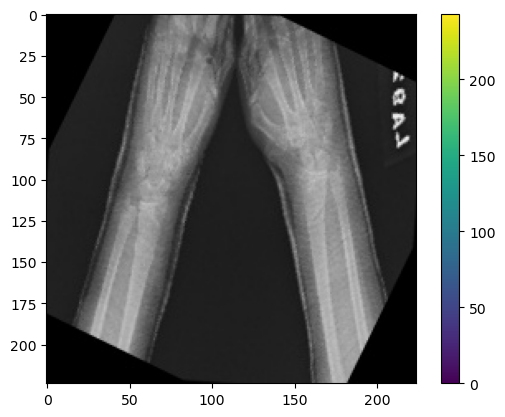

In [26]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
# normalize to range 0-1
train_images = train_data / 255.0
test_images = test_data / 255.0
val_images = val_data / 255.0

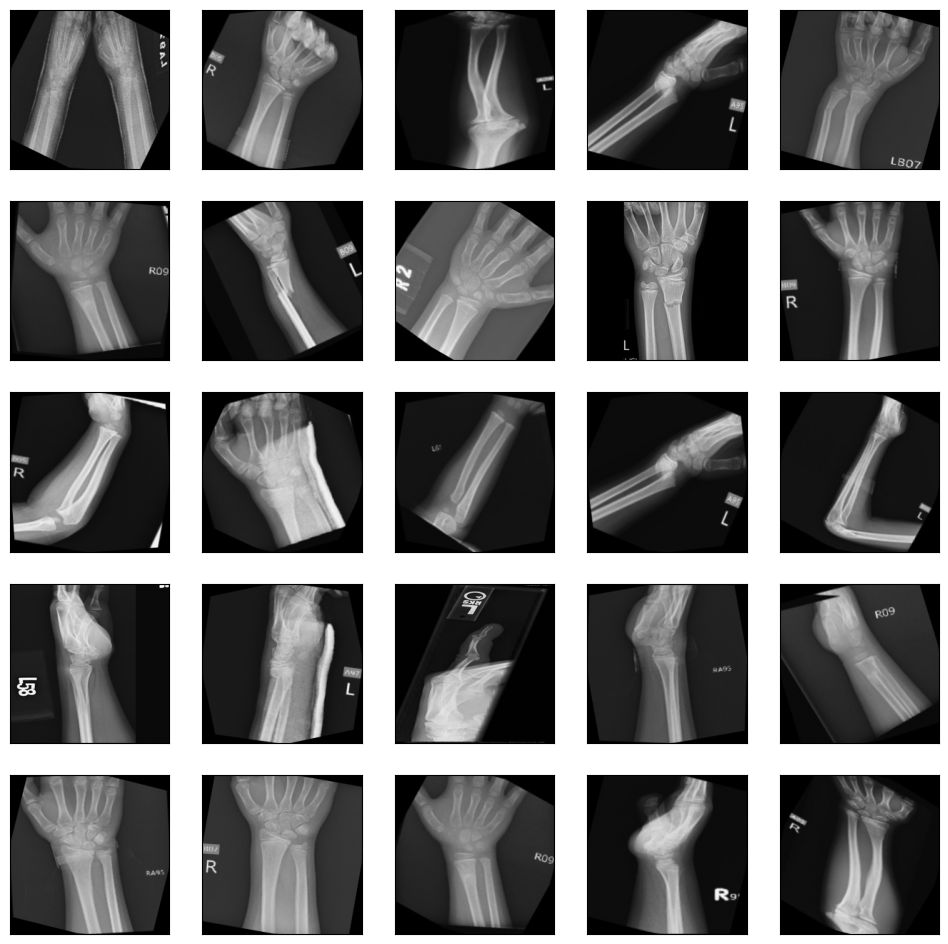

In [28]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

plt.show()

# II. DNN
### three hidden layers 128,256,128, and three dropout layers after each hidden layers, softmax

In [29]:
#Model 1: a simple neural network model

def create_model():
    model = Sequential([
        # Flatten the input images to a vector
        Flatten(input_shape=(224, 224, 3)),

        # First Dense layer with ReLU activation
        Dense(128, activation='relu'),
        BatchNormalization(),  # Normalize the activations of the first layer
        Dropout(0.5),  # Dropout 50% of the nodes of the previous layer during training

        # Second Dense layer with more neurons
        Dense(256, activation='relu'),
        BatchNormalization(),  # Normalize the activations of the second layer
        Dropout(0.5),  # Dropout 50% of the nodes

        # Third Dense layer
        Dense(128, activation='relu'),
        BatchNormalization(),  # Normalize the activations of the third layer
        Dropout(0.5),  # Dropout 50% of the nodes

        # Output layer with 1 unit for binary classification
        Dense(2, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model_dnn = create_model()

# Display the model summary to understand its structure
model_dnn.summary()

/Users/mingentsai/miniconda3/envs/py3k/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,335,938 (73.76 MB)

 Trainable params: 19,334,914 (73.76 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [30]:
from tensorflow import keras

# Define the callback list with early stopping and model checkpoint
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
    keras.callbacks.ModelCheckpoint(filepath="model_dnn_best.keras", monitor="val_loss", save_best_only=True)
]

# Train the model
history_dnn = model_dnn.fit(
    train_images,
    train_labels,  
    epochs=100,
    batch_size=64,
    validation_data=(val_images, val_labels), # Using explicit validation set
    callbacks=callbacks_list)

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.5803 - loss: 0.9607 - val_accuracy: 0.6844 - val_loss: 0.7152
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7067 - loss: 0.5978 - val_accuracy: 0.7872 - val_loss: 0.5219
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7861 - loss: 0.4619 - val_accuracy: 0.7981 - val_loss: 0.5106
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8298 - loss: 0.3876 - val_accuracy: 0.8126 - val_loss: 0.5273
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8499 - loss: 0.3557 - val_accuracy: 0.5744 - val_loss: 1.0896


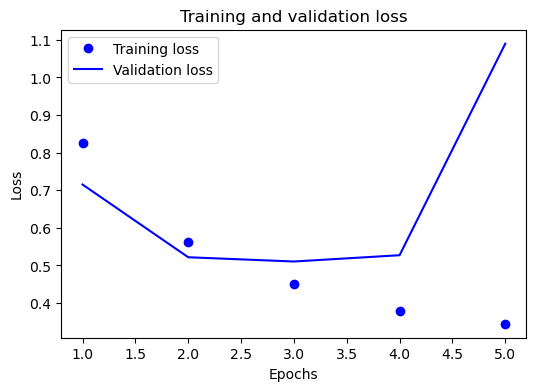

In [31]:
import matplotlib.pyplot as plt

history_dict = history_dnn.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Set up the range of epochs
epochs = range(1, len(loss_values) + 1)

# Create a plot of the training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
# Load the best model and evaluate it on the test set
model_best = keras.models.load_model("model_dnn_best.keras")
test_loss, test_acc = model_best.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7711 - loss: 0.5512
Test accuracy: 0.790224015712738


# III. CNN
### two councolutional layers, softmax

In [33]:
def create_model_cnn():
    model = Sequential([
        # First convolutional layer with 32 filters, kernel size of 3x3, ReLU activation, and same padding
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        # First pooling layer which reduces image size by half
        MaxPooling2D((2, 2)),

        # Second convolutional layer with 64 filters
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        # Second pooling layer
        MaxPooling2D((2, 2)),

        # Flattening the output of the convolutional layers to feed into the dense layer
        Flatten(),

        # Densely connected layer with 64 neurons
        Dense(64, activation='relu'),

        Dense(2, activation='softmax')])

    # Compiling the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the CNN model instance
model_cnn = create_model_cnn()

# Display the model summary to understand its structure
model_cnn.summary()

/Users/mingentsai/miniconda3/envs/py3k/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,864,642 (49.07 MB)

 Trainable params: 12,864,642 (49.07 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Define the callback list with early stopping and model checkpoint
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
    keras.callbacks.ModelCheckpoint(filepath="model_cnn_best.keras", monitor="val_loss", save_best_only=True)
]

# Train the model
history_cnn = model_cnn.fit(
    train_images,
    train_labels,  
    epochs=100,
    batch_size=64,
    validation_data=(val_images, val_labels),  # Using explicit validation set
    callbacks=callbacks_list)

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 77s 530ms/step - accuracy: 0.5823 - loss: 1.0475 - val_accuracy: 0.8283 - val_loss: 0.4543
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 77s 535ms/step - accuracy: 0.9281 - loss: 0.2032 - val_accuracy: 0.9154 - val_loss: 0.2711
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 76s 530ms/step - accuracy: 0.9845 - loss: 0.0545 - val_accuracy: 0.9190 - val_loss: 0.4145
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 75s 522ms/step - accuracy: 0.9935 - loss: 0.0193 - val_accuracy: 0.9323 - val_loss: 0.3100


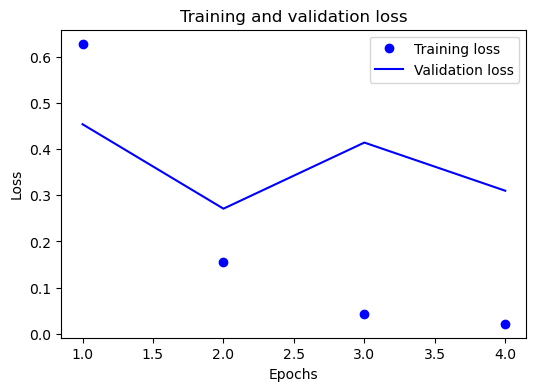

In [35]:
import matplotlib.pyplot as plt

history_dict = history_cnn.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Set up the range of epochs
epochs = range(1, len(loss_values) + 1)

# Create a plot of the training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
model_best = keras.models.load_model("model_cnn_best.keras")
test_loss, test_acc = model_best.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8996 - loss: 0.2352
Test accuracy: 0.9002036452293396
